In [1]:
# Basic data and visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer,  KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score
)

In [2]:
df = pd.read_csv("/Users/ssgmcollege/Machine_learning_codes/diabetes.csv")
print(f"Dataset loaded to dataframe df having dimensions {df.shape}")

Dataset loaded to dataframe df having dimensions (768, 9)


In [3]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [5]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Total NULL Values : 0


In [6]:
display(df.dtypes)

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [7]:
display((df == 0).sum())

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome          500
dtype: int64

/var/folders/wk/58ghpc0s1l9ccf87ltspwy3w0000gn/T/ipykernel_52057/2239838959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


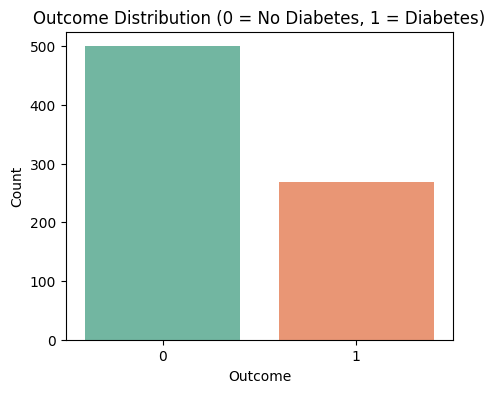

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Outcome Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN 
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Initialize KNN Imputer
# n_neighbors=5 is default (
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Apply imputer only on selected columns
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

#  Verify the result
print(df[cols_with_zero].isna().sum()) 

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [10]:
print(df['Outcome'].value_counts(normalize=True))


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [11]:
# cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# for c in cols_with_zero:
#     if c in df.columns:
#         df[c] = df[c].replace(0, np.nan)


In [12]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [14]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


In [15]:
param_grid = {
    'knn__n_neighbors': np.arange(1, 41),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # p=1 -> Manhattan, p=2 -> Euclidean
}


In [16]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [17]:
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best params: {'knn__n_neighbors': 27, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV accuracy: 0.7847376311844079


In [18]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = None
if hasattr(best_model.named_steps['knn'], "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:,1]


In [19]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Predict on test data
# y_pred = knn.predict(X_test)

Test Accuracy: 0.7604166666666666
Test Error rate: 0.23958333333333337
Precision: 0.6909090909090909
Recall: 0.5671641791044776
F1 score: 0.6229508196721312
Confusion Matrix:
 [[108  17]
 [ 29  38]]


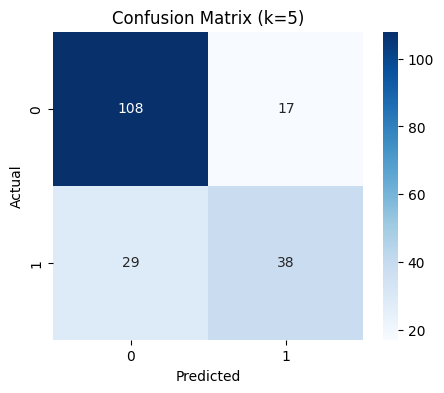


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.69      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



In [20]:
acc = accuracy_score(y_test, y_pred)
err_rate = 1 - acc
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



print("Test Accuracy:", acc)
print("Test Error rate:", err_rate)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nClassification report:\n", classification_report(y_test, y_pred))


Minimum Error Rate: 0.234 at k = 7
Corresponding Accuracy: 0.766


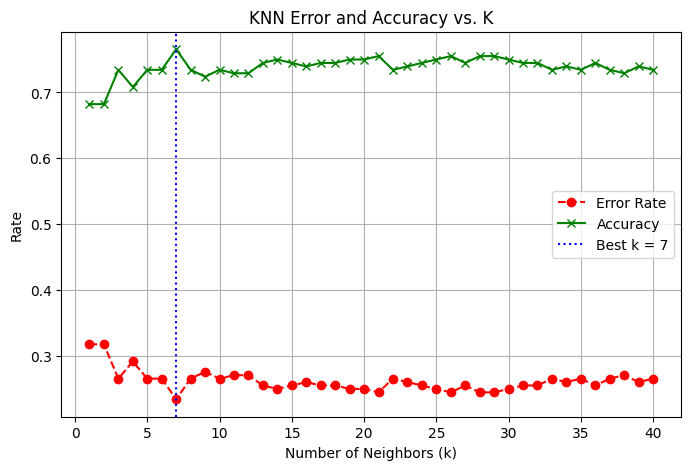

In [21]:

imputer = KNNImputer(n_neighbors=16, weights='uniform')


X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


error_rate = []
acc_values = []

for k in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)

    error_rate.append(np.mean(pred_k != y_test))
    acc_values.append(accuracy_score(y_test, pred_k))

# --- Step 4: Find best k ---
min_error = min(error_rate)
best_k = error_rate.index(min_error) + 1 
best_acc = acc_values[best_k - 1]

print(f"Minimum Error Rate: {min_error:.3f} at k = {best_k}")
print(f"Corresponding Accuracy: {best_acc:.3f}")

# --- Step 5: Plot it ---
plt.figure(figsize=(8,5))
plt.plot(range(1,41), error_rate, color='red', linestyle='--', marker='o', label='Error Rate')
plt.plot(range(1,41), acc_values, color='green', marker='x', label='Accuracy')
plt.axvline(best_k, color='blue', linestyle=':', label=f'Best k = {best_k}')
plt.title('KNN Error and Accuracy vs. K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# error_rate = []
# acc_values = []

# for k in range(1, 41):
#     model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
#     model.fit(X_train, y_train)
#     pred_k = model.predict(X_test)
#     error_rate.append(np.mean(pred_k != y_test))
#     acc_values.append(accuracy_score(y_test, pred_k))

# min_error = min(error_rate)
# best_k = error_rate.index(min_error) + 1
# best_acc = acc_values[best_k - 1]

# print(f"Minimum Error Rate: {min_error:.3f} at k = {best_k}")
# print(f"Corresponding Accuracy: {best_acc:.3f}")

# plt.figure(figsize=(8,5))
# plt.plot(range(1,41), error_rate, color='red', linestyle='--', marker='o', label='Error Rate')
# plt.plot(range(1,41), acc_values, color='green', marker='x', label='Accuracy')
# plt.axvline(best_k, color='blue', linestyle=':', label=f'Best k = {best_k}')
# plt.title('KNN Error and Accuracy vs. K')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Rate')
# plt.legend()
# plt.grid(True)
# plt.show()



In [23]:
# param_grid = {'n_neighbors': np.arange(1, 41)}

# # 5-fold cross-validation Grid Search
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# # Show best result
# print("Best k from GridSearchCV:", grid.best_params_['n_neighbors'])
# print("Best cross-validation accuracy:", grid.best_score_)

# # Train final KNN with best k on full training set
# knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
# knn_final.fit(X_train, y_train)

# # Predict on test set
# y_test_pred = knn_final.predict(X_test)

# # Calculate test accuracy and other metrics
# test_acc = accuracy_score(y_test, y_test_pred)
# print(f"\nTest Accuracy with k={best_k}: {test_acc:.4f}")

# # Confusion matrix
# cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title(f'Confusion Matrix (k={best_k})')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Classification report
# print("\nClassification Report:\n", classification_report(y_test, y_test_pred, digits=4))